In [91]:
import json
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import xview_coco
import os
import random
from shutil import copyfile

%matplotlib inline

In [3]:
# Opening JSON file
f = open('train_labels/xView_train.geojson', 'r')

# returns JSON object as
# a dictionary
data = json.load(f)

# Closing file
f.close()

In [ ]:
index = 1234

In [4]:
data['features'][index]

{'type': 'Feature',
 'properties': {'bounds_imcoords': '2712,1145,2746,1177',
  'edited_by': 'wwoscarbecerril',
  'cat_id': '1040010028371A00',
  'type_id': 73,
  'ingest_time': '2017/07/24 12:49:09.118+00',
  'index_right': 2356,
  'image_id': '2355.tif',
  'point_geom': '0101000020E6100000616E4E6406A256C03BE6ADA0D6212D40',
  'feature_id': 374410,
  'grid_file': 'Grid2.shp'},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-90.53169885094464, 14.56603647302396],
    [-90.53169885094464, 14.56614473506768],
    [-90.53158140073565, 14.56614473506768],
    [-90.53158140073565, 14.56603647302396],
    [-90.53169885094464, 14.56603647302396]]]}}

In [5]:
bbox = data['features'][index]['properties']['bounds_imcoords']
print(bbox)
print(type(bbox))
bbox = [int(x) for x in bbox.split(',')]
print(bbox)
print(type(bbox[0]))

2712,1145,2746,1177
<class 'str'>
[2712, 1145, 2746, 1177]
<class 'int'>


In [6]:
imgstr = data['features'][index]['properties']['image_id']
print(imgstr)

2355.tif


(2667, 2739, 3)
<class 'numpy.ndarray'>
[2712, 2746, 1145, 1177]
(0, 32, 3)


ValueError: zero-size array to reduction operation minimum which has no identity

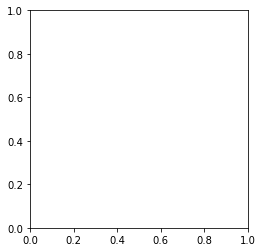

In [7]:
img = Image.open("train_images/"+imgstr)

arr = np.asarray(img)
print(arr.shape)
#print(type(arr))

print([bbox[1], bbox[3], bbox[0], bbox[2]])

img2 = arr[bbox[1]:bbox[3], bbox[0]:bbox[2], :]
print(img2.shape)

plt.imshow(img2)

#Image.transform(size, method, data=None, resample=0, fill=1, fillcolor=None)

In [8]:
#from pprint import pprint
from pyproj import Proj, transform
import rasterio as rio

def image_latlon_pxpy(latitude, longitude):
    dataset = rio.open("train_images/"+imgstr, crs='epsg:3857')
    coords = transform(Proj(init='epsg:4326'), Proj(init='epsg:3857'), longitude, latitude)
    px, py = coords[0], coords[1]
    print(px,py)
    px_pc = (px - dataset.bounds.left) / (dataset.bounds.right - dataset.bounds.left)
    py_pc = (dataset.bounds.top - py) / (dataset.bounds.top - dataset.bounds.bottom)
    return (px_pc*dataset.width, py_pc*dataset.height)

#pprint(image_latlon_pxpy(39.603786, -104.9429))
#(256,256)

for coord in data['features'][50]['geometry']['coordinates'][0]:
    print('coord', coord)
    row,col = image_latlon_pxpy(latitude=coord[1], longitude=coord[0])
    print(row,col)

coord [-90.53447284267835, 14.570009860618576]
-10078251.41608441 1639694.6105493787
-2933060749661.615 -477198293251.45483
coord [-90.53447284267835, 14.570149137293045]
-10078251.41608441 1639710.6299303884
-2933060749661.615 -477202955393.5119
coord [-90.5342437701325, 14.570149137293045]
-10078225.91584525 1639710.6299303884
-2933053328292.6265 -477202955393.5119
coord [-90.5342437701325, 14.570009860618576]
-10078225.91584525 1639694.6105493787
-2933053328292.6265 -477198293251.45483
coord [-90.53447284267835, 14.570009860618576]
-10078251.41608441 1639694.6105493787
-2933060749661.615 -477198293251.45483


C:\Users\Admin\anaconda3\envs\pytorch38\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\Admin\anaconda3\envs\pytorch38\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\Admin\AppData\Local\Temp/ipykernel_8440/2294188698.py:7: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pypr

In [78]:
train_or_val = "train"

In [2]:
geojson_path = train_or_val+"_labels/xView_"+train_or_val+".geojson"
classes_path = "xview-class-labels.txt"
image_folder = train_or_val+"_images/"
json_path = xview_coco.make_json(geojson_path, classes_path, image_folder)

Found 846 images in folder
50 images processed
100 images processed
150 images processed
200 images processed
250 images processed
300 images processed
350 images processed
400 images processed
450 images processed
500 images processed
550 images processed
600 images processed
650 images processed
700 images processed
750 images processed
800 images processed
All images processed
JSON sections complete
Part 1 complete
Corrected 5073 boxes with coords below 0 and 4941 with coords larger than image
Removed 32 annotations
New json train_labels/xView_train.json


'train_labels/xView_train.json'

In [7]:
with open(json_path, 'r') as f:
    gt = json.load(f)

In [77]:
if not os.path.exists('chips_'+train_or_val):
    os.makedirs('chips_'+train_or_val)

j = 0

#Process each annotation one by one
for a in gt['annotations']:
    
    # there's an error so start from here
    if j >= 421955:
        
        # Key annotation information
        bbox = a['bbox']
        im_id = a['image_id']
        
        # some images don't exist.......
        if im_id not in [1395]:
            
            imgstr = "train_images/"+str(im_id)+".tif"
            img = Image.open(imgstr)
            arr = np.asarray(img)
            # bbox is x, y, width, height
            arr2 = arr[bbox[1]:bbox[1]+bbox[3], bbox[0]:bbox[0]+bbox[2], :]
            #print('bbox', bbox)
            #print(arr.shape)
            #print(arr2.shape)
            #plt.imshow(arr2)

            # create a directory with the class name
            if not os.path.exists('chips_'+train_or_val+'/'+str(a['category_id'])):
                os.makedirs('chips_'+train_or_val+'/'+str(a['category_id']))

            img2 = Image.fromarray(arr2.astype('uint8'), 'RGB')
            img2 = img2.save('chips_'+train_or_val+'/'+str(a['category_id'])+"/"+str(j)+".png")

    if j%10000 == 0:
        print(j, "/", len(gt['annotations']))
    j += 1--

0 / 601905
10000 / 601905
20000 / 601905
30000 / 601905
40000 / 601905
50000 / 601905
60000 / 601905
70000 / 601905
80000 / 601905
90000 / 601905
100000 / 601905
110000 / 601905
120000 / 601905
130000 / 601905
140000 / 601905
150000 / 601905
160000 / 601905
170000 / 601905
180000 / 601905
190000 / 601905
200000 / 601905
210000 / 601905
220000 / 601905
230000 / 601905
240000 / 601905
250000 / 601905
260000 / 601905
270000 / 601905
280000 / 601905
290000 / 601905
300000 / 601905
310000 / 601905
320000 / 601905
330000 / 601905
340000 / 601905
350000 / 601905
360000 / 601905
370000 / 601905
380000 / 601905
390000 / 601905
400000 / 601905
410000 / 601905
420000 / 601905
430000 / 601905
440000 / 601905
450000 / 601905
460000 / 601905
470000 / 601905
480000 / 601905
490000 / 601905
500000 / 601905
510000 / 601905
520000 / 601905
530000 / 601905
540000 / 601905
550000 / 601905
560000 / 601905
570000 / 601905
580000 / 601905
590000 / 601905
600000 / 601905


In [75]:
j

421955

In [83]:
# with open("xview-class-labels.txt", "r") as f:
#     xv = f.read().splitlines()

In [84]:
# for x in xv:
#     num, name = x.split(":")
#     name = name.replace("/", " ")
#     os.rename("chips_train_all_examples/"+num, "chips_train_all_examples/"+name)

In [92]:
# go through each subdirectory and copy 80% images into new train directory and 20% into new test directory
for root, dirs, files in os.walk("chips_train_all_examples"):
    break

for d in dirs:
    print(d)
    for root, dirs2, files in os.walk("chips_train_all_examples/"+d):
        break
    train_files = []
    test_files = []
    for fi in files:
        if random.random() <= 0.8:
            train_files.append(fi)
        else:
            test_files.append(fi)
    if not os.path.exists("chips_train"):
        os.makedirs("chips_train")
    for fi in train_files:
        if not os.path.exists("chips_train/"+d):
            os.makedirs("chips_train/"+d)
        src = "chips_train_all_examples/"+d+"/"+fi
        dst = "chips_train/"+d+"/"+fi
        copyfile(src, dst)
    if not os.path.exists("chips_test"):
        os.makedirs("chips_test")
    for fi in test_files:
        if not os.path.exists("chips_test/"+d):
            os.makedirs("chips_test/"+d)
        src = "chips_train_all_examples/"+d+"/"+fi
        dst = "chips_test/"+d+"/"+fi
        copyfile(src, dst)

75
82
Aircraft Hangar
Barge
Building
Bus
Cargo Car
Cargo Plane
Cargo Truck
Cement Mixer
Construction Site
Container Crane
Container Ship
Crane Truck
Damaged Building
Dump Truck
Engineering Vehicle
Excavator
Facility
Ferry
Fishing Vessel
Fixed-wing Aircraft
Flat Car
Front loader Bulldozer
Ground Grader
Haul Truck
Helicopter
Helipad
Hut Tent
Locomotive
Maritime Vessel
Mobile Crane
Motorboat
Oil Tanker
Passenger Car
Passenger Vehicle
Pickup Truck
Pylon
Railway Vehicle
Reach Stacker
Sailboat
Scraper Tractor
Shed
Shipping Container
Shipping container lot
Small Aircraft
Small Car
Storage Tank
Straddle Carrier
Tank car
Tower
Tower crane
Trailer
Truck
Truck Tractor
Truck w Box
Truck w Flatbed
Truck w Liquid
Tugboat
Utility Truck
Vehicle Lot
Yacht
